Example: Predicting Stock Prices Using RNN


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.model_selection import train_test_split


In [ ]:
# Load dataset
data = pd.read_csv(r"/content/stock_prices.csv")  # Contains 'Date' and 'Close' columns
data = data[['Close']]

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Create sequences for training
sequence_length = 50
X, y = [], []

for i in range(sequence_length, len(data_scaled)):
    X.append(data_scaled[i-sequence_length:i, 0])
    y.append(data_scaled[i, 0])

X, y = np.array(X), np.array(y)

# Reshape for RNN input
X = X.reshape((X.shape[0], X.shape[1], 1))


In [ ]:
data.head()

,Close
0,60.770500
1,55.745499
2,60.986500
3,54.216499
4,55.990002


from matplotlib import pyplot as plt
_df_0['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(X_train.shape[1], 1)),
    Dense(1)  # Output layer for predicting the next value
])

model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=2)


Epoch 1/20
15/15 - 2s - 154ms/step - loss: 0.1064
Epoch 2/20
15/15 - 1s - 84ms/step - loss: 0.0046
Epoch 3/20
15/15 - 0s - 7ms/step - loss: 0.0024
Epoch 4/20
15/15 - 0s - 10ms/step - loss: 0.0017
Epoch 5/20
15/15 - 0s - 7ms/step - loss: 0.0015
Epoch 6/20
15/15 - 0s - 10ms/step - loss: 0.0013
Epoch 7/20
15/15 - 0s - 9ms/step - loss: 0.0013
Epoch 8/20
15/15 - 0s - 8ms/step - loss: 0.0013
Epoch 9/20
15/15 - 0s - 7ms/step - loss: 0.0012
Epoch 10/20
15/15 - 0s - 8ms/step - loss: 0.0012
Epoch 11/20
15/15 - 0s - 7ms/step - loss: 0.0012
Epoch 12/20
15/15 - 0s - 9ms/step - loss: 0.0011
Epoch 13/20
15/15 - 0s - 9ms/step - loss: 0.0011
Epoch 14/20
15/15 - 0s - 9ms/step - loss: 0.0011
Epoch 15/20
15/15 - 0s - 8ms/step - loss: 0.0011
Epoch 16/20
15/15 - 0s - 8ms/step - loss: 0.0012
Epoch 17/20
15/15 - 0s - 7ms/step - loss: 0.0011
Epoch 18/20
15/15 - 0s - 9ms/step - loss: 0.0011
Epoch 19/20
15/15 - 0s - 9ms/step - loss: 0.0010
Epoch 20/20
15/15 - 0s - 8ms/step - loss: 9.3293e-04


In [ ]:
# Predict on test data
predicted_prices = model.predict(X_test)

# Reverse scaling to get actual prices
predicted_prices = scaler.inverse_transform(predicted_prices.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step


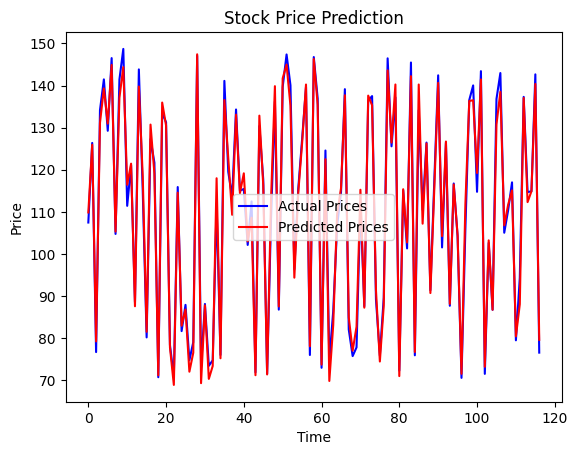

In [ ]:
import matplotlib.pyplot as plt

plt.plot(y_test_actual, color='blue', label='Actual Prices')
plt.plot(predicted_prices, color='red', label='Predicted Prices')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
data = pd.read_csv(r'/weather.csv')

In [ ]:
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


from matplotlib import pyplot as plt
_df_2['MinTemp'].plot(kind='hist', bins=20, title='MinTemp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['MaxTemp'].plot(kind='hist', bins=20, title='MaxTemp')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Rainfall'].plot(kind='hist', bins=20, title='Rainfall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5['Evaporation'].plot(kind='hist', bins=20, title='Evaporation')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('WindGustDir').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('WindDir9am').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_8.groupby('WindDir3pm').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_9.groupby('RainToday').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='MinTemp', y='MaxTemp', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='MaxTemp', y='Rainfall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12.plot(kind='scatter', x='Rainfall', y='Evaporation', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13.plot(kind='scatter', x='Evaporation', y='Sunshine', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['MinTemp'].plot(kind='line', figsize=(8, 4), title='MinTemp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['MaxTemp'].plot(kind='line', figsize=(8, 4), title='MaxTemp')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['Rainfall'].plot(kind='line', figsize=(8, 4), title='Rainfall')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Evaporation'].plot(kind='line', figsize=(8, 4), title='Evaporation')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['WindDir9am'].value_counts()
    for x_label, grp in _df_18.groupby('WindGustDir')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('WindGustDir')
_ = plt.ylabel('WindDir9am')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['WindDir3pm'].value_counts()
    for x_label, grp in _df_19.groupby('WindDir9am')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('WindDir9am')
_ = plt.ylabel('WindDir3pm')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['RainToday'].value_counts()
    for x_label, grp in _df_20.groupby('WindDir3pm')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('WindDir3pm')
_ = plt.ylabel('RainToday')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['RainTomorrow'].value_counts()
    for x_label, grp in _df_21.groupby('RainToday')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('RainToday')
_ = plt.ylabel('RainTomorrow')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['WindGustDir'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='MinTemp', y='WindGustDir', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_23['WindDir9am'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_23, x='MinTemp', y='WindDir9am', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['WindDir3pm'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='MinTemp', y='WindDir3pm', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['RainToday'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='MinTemp', y='RainToday', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Daily Weather Data